In [1]:
require 'nn'
require 'UtilsMultiGPU'
json = require 'json'
video = assert(require("libvideo_decoder"))
cmd = torch.CmdLine()
cmd:option('-modelPath', 'video_segmentation.t7', 'Path of model to load')
cmd:option('-videoPath', 'prepare_datasets/dataset/train_bak/2ac20d64-ac03-11e6-9c72-d017c2cf90d9.avi', 'Path to the input image to predict on')
cmd:option('-frameNum', 11, 'Number of continuous frames for one sample')
cmd:option('-nGPU', 1)

In [2]:
opt = cmd:parse("")

In [3]:
if opt.nGPU > 0 then
    require 'cunn'
    require 'cudnn'
end

In [4]:
model =  loadDataParallel(opt.modelPath, opt.nGPU)

In [5]:
net_opt = json.load('params.json')

In [6]:
status, height, width, length, fps = video.init(opt.videoPath)

In [7]:
assert(height == net_opt.input_height, 'video height must be equal to the Network input_height')
assert(width == net_opt.input_width, 'video width must be equal to the Network input_width')
assert(opt.frameNum == net_opt.input_channel, 'frameNum must be equal to the Network input_channel')

In [8]:
result = ""
start_frame_idx = 1 + (opt.frameNum - 1) / 2
for x = 1, start_frame_idx - 1 do
    result = result .. "-"
--     table.insert(result, '-')
end

In [9]:
clip = torch.ByteTensor(opt.frameNum, height, width)
frame_idx = 0
frame = torch.ByteTensor(3, height, width)
input = torch.Tensor(1, opt.frameNum, height, width):zero()

In [10]:
while true do
    frame_idx = frame_idx + 1
    print(frame_idx)
    status = video.frame_rgb(frame)
    if status == false then
        video.exit()
        break
    end
    if frame_idx < opt.frameNum then
        clip[frame_idx + 1] = image.rgb2y(frame)
        goto continue
    end

    for x = 1, opt.frameNum - 1 do
        clip[x] = clip[x + 1]
    end
    clip[opt.frameNum] = image.rgb2y(frame)

    -- local target_frame_idx = frame_idx - (opt.frameNum - 1) / 2
    input[1]:copy(clip)
    local predictions = model:forward(input:cuda())
    -- parse the prediction and insert to result table
    _, prediction = torch.max(predictions[1], 1)
    result = result .. prediction[1]
--     table.insert(result, prediction[1][1])
    if frame_idx == 105 then
        break
    end
    ::continue::
end

1	


2	


3	
4	


5	


6	


7	


8	


9	


10	
11	


12	


13	


14	


15	


16	


17	


18	


19	


20	


21	


22	


23	


24	


25	


26	


27	


28	


29	


30	


31	


32	


33	


34	


35	


36	


37	


38	


39	


40	


41	


42	


43	


44	


45	


46	


47	


48	


49	


50	


51	


52	


53	


54	


55	


56	


57	


58	


59	


60	


61	


62	


63	


64	


65	


66	


67	


68	


69	


70	


71	


72	


73	


74	


75	


76	


77	


78	


79	


80	


81	


82	

83	


84	


85	


86	


87	


88	


89	


90	


91	


92	


93	


94	


95	


96	


97	


98	


99	


100	


101	


102	


103	


104	


105	


In [15]:
result

-----22222222222222222222222222222222122122222122222222222222222222222222222222222222222222222222222	


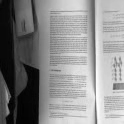

In [14]:
itorch.image(input[1][2])

In [11]:
for x = #result + 1, frame_idx - 1 do
    result = result .. '-'
--     table.insert(result, '-')
end

In [12]:
result

-----2222222222222222222222222222222212212222212222222222222222222222222222222222222222222222222222222221122122222221222122122222222222222222222222222222222222222122222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222122221111222222222222222222222222222222222222222222212222212222222222222222222221222222222222222222222222222222222222222222222222222221222222222222222222222222222222222222222222222222222222222222221222222222222222222222222222222222221222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222221222222222222222222222222222222222211112111221111111111111222222222222222222222222222222222222222222222222222222222222222222222222222122212111221111111111222222222221211122222222222222222221222222222222222222222112222222222222222222212222222222222221221222222222222222222222-----	


In [27]:
string.sub(label_content, 100, 100)

1	


In [17]:
label_content

22222222222222222222222222222222222222222222222222222222222222222222222222222222222222222211111111111111111111111111111111111111222222222222222222222222211111111111111111111111111111111111222222222222222222222222222222222222222222222222222222222222222222222211111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111111111111222222222222222222222222222222222222222222222222222222222222222211111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111112222222222222222222222222222222222222222222222222222222222222222211111111111111111111111111111111111112222222222222222222222222222222222222222222222222222222221111111111111111111111111111111111122222222222222222222222222222222222222222222222222222222222222222222222222211111111111111111111111111111111111111111111112222222222222222222222222222111111111111111111111111111111111111111111112222222222222222222222222	


In [16]:
label = { }
for line in io.lines('prepare_datasets/dataset/train_bak/2ac20d64-ac03-11e6-9c72-d017c2cf90d9.txt') do
    label_content = line
end